In [63]:
# Import Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("tyres_train.csv")

INSPECTION DATA


In [65]:
# Check how is made the dataset 
data.sample(10)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
406,17.858,28,1,0.19,0.02,0.64,4,1,387.0,3,1,1,5.65,NaN,1,0
2351,17.904,25,1,0.16,0.01,-7.64,0,1,316.5,8,0,1,5.19,NaN,1,0
2500,17.308,38,0,0.11,0.00,-1.44,4,1,259.0,9,1,0,5.73,NaN,0,0
2331,17.464,23,1,0.16,0.01,-8.76,0,1,331.0,8,0,1,5.54,NaN,1,0
782,16.314,31,1,0.62,0.05,-1.64,2,1,351.5,8,0,0,6.03,NaN,1,0
2468,19.356,34,1,0.21,0.00,-9.24,1,0,619.0,8,3,0,5.89,NaN,1,0
1389,18.764,32,1,0.37,0.02,4.96,1,0,395.5,11,0,0,6.70,NaN,0,1
2442,18.554,30,1,0.19,0.02,-2.44,0,1,351.5,5,3,1,5.75,NaN,1,0
618,22.418,29,1,0.30,0.01,-2.32,2,0,397.0,11,1,0,5.62,58.6,1,1
272,16.758,28,1,0.62,0.05,13.84,2,1,608.0,1,2,0,6.27,NaN,1,1


In [66]:
print(data.shape) # Checking the shape of the dataset. 3000 rows, 16 columns

(3000, 16)


In [67]:
data.columns #Checking for the columns of the dataset

Index(['vulc', 'perc_nat_rubber', 'wiring_strength', 'weather', 'perc_imp',
       'temperature', 'tread_type', 'tyre_season', 'elevation', 'month',
       'tread_depth', 'tyre_quality', 'perc_exp_comp', 'diameter',
       'add_layers', 'failure'],
      dtype='object')

### DATA PREPARATION


CHECK FOR DUPLICATES VALUE


In [68]:
#Use command '.duplicated' in orter 
# to see if there is any duplicated value 
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [69]:
data[data.duplicated()]
# No duplicated values

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure


CHECK FOR MISSING VALUES

In [70]:
data.isna().any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool

In [71]:
# Check how many values are missing in each column
# 2110 missing values for the attribute 'diameter'
data.isna().sum()

vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

DEAL WITH MISSING VALUES

In [72]:
# We decide to drop the column due to the large 
# amount of missing values 
#(approximately 70% of the values of the column).
# Alternatives such as replacement have been 
# discarded since the number 
#of missing values is very high.
# Now the dataset has 3000 rows and 15 columns
data_drop = data.dropna(axis=1)
print(data_drop.shape)


(3000, 15)


CHECK TARGET VARIABLE


failure
0    1992
1    1008
dtype: int64


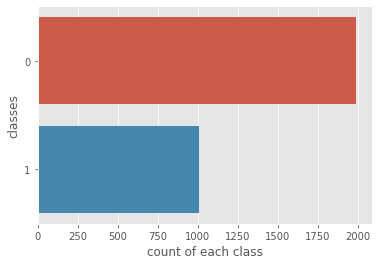

In [73]:
# The target variable is 'failure'.
# Here we check the number of 1 and 0 in the target
# column in order to see if the dataset is balanced
# The dataset is unbalanced beacuse 66.4% are
# ones and 33.6% are zeros
print(data_drop.groupby('failure').size())

plt.style.use('ggplot')

#Visualize the result with 'countplot'
sns.countplot(y = data_drop.failure, data = data_drop) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

DIVISION OF THE DATASET IN 'CATEGORICAL' AND 'NUMERICAL' VARIABLES

In [74]:
# We check the type of the variables
# We don't need to perform any transformation 
#like 'dummies' because the variables
# are either 'float64' or 'int64'.
data_drop.dtypes

vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
add_layers           int64
failure              int64
dtype: object

In [75]:
# 'data_drop_cat' contain all the categorical variables
data_drop_cat = data_drop.select_dtypes(include=['int'])
data_drop_cat = data_drop_cat.drop(['perc_nat_rubber','failure'],axis=1)
data_drop_cat.head()

,wiring_strength,tread_type,tyre_season,month,tread_depth,tyre_quality,add_layers
0,1,0,1,8,0,1,1
1,1,2,0,11,1,0,1
2,1,0,0,0,1,0,1
3,1,1,0,7,3,1,1
4,2,0,1,2,2,0,1


In [76]:
# 'data_drop_num' contains all the numerical variables
data_drop_num = data_drop.drop(['tread_type','tyre_season', 'month','tread_depth', 'wiring_strength', 'tyre_quality', 'add_layers'], axis = 1)
data_drop_num.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
0,17.990,26,0.16,0.01,-8.12,332.5,5.13,0
1,20.704,36,0.30,0.01,-4.52,328.0,6.15,0
2,19.156,34,0.30,0.01,-1.08,247.0,6.36,0
3,16.802,35,0.19,0.02,7.44,408.0,6.62,0
4,17.140,23,0.39,0.01,30.52,308.0,6.15,0


### DATA EXPLORATION


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


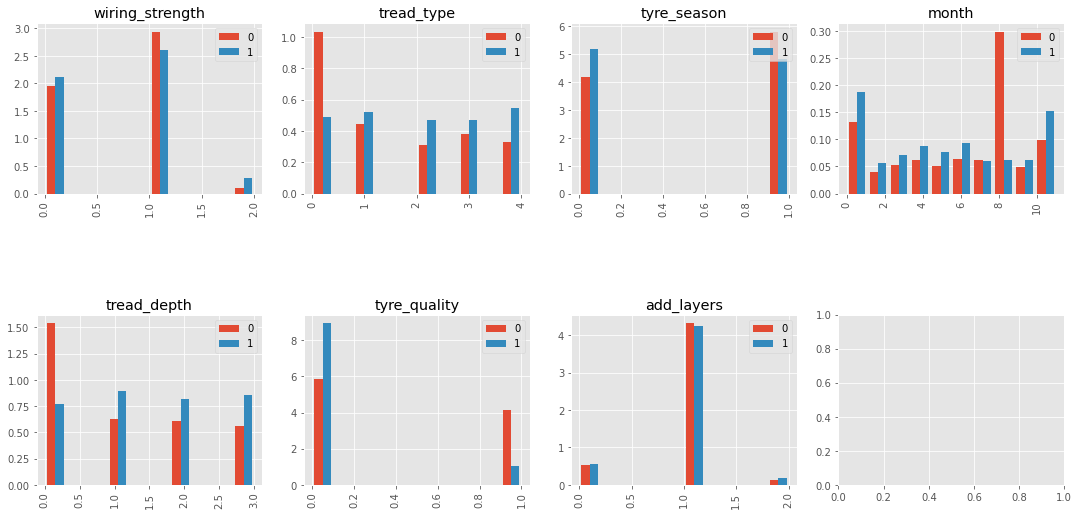

In [77]:
# Divide categorical data depending on 
# their value in 'failure'
# The results have been plotted with histograms

data_0 = data_drop_cat[data_drop['failure']==0]
data_1 = data_drop_cat[data_drop['failure']==1]


fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in data_drop_cat.columns:
    plt.sca(axes[i]) 
    plt.hist([data_0[x],data_1[x]],density=True)
    plt.xticks(rotation = 90)
    plt.title(x)
    axes[i].legend(('0','1'), loc='upper right');
    i+=1
plt.show()

In [78]:
# interesting patterns in some attributes
# like 'tyre_season' and 'tyre_quality'

NUMERICAL DATA

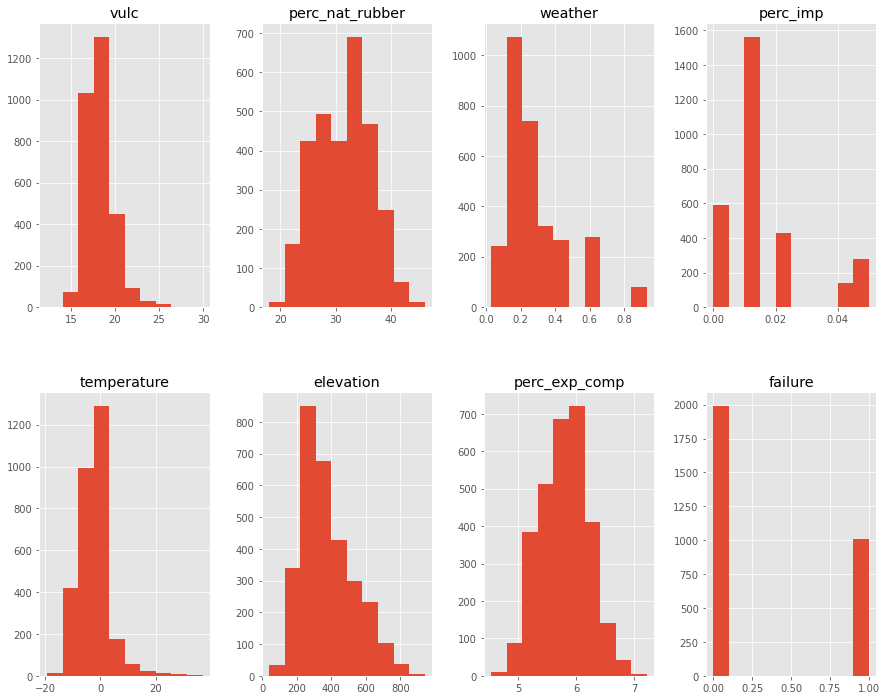

In [79]:
# Here we analyze the distribution of the
# numerical variables
# None of the transormations tried (like log)
# have shown improvement in the results
data_hist=data_drop_num.hist(layout=(2,4), figsize=(15,12))

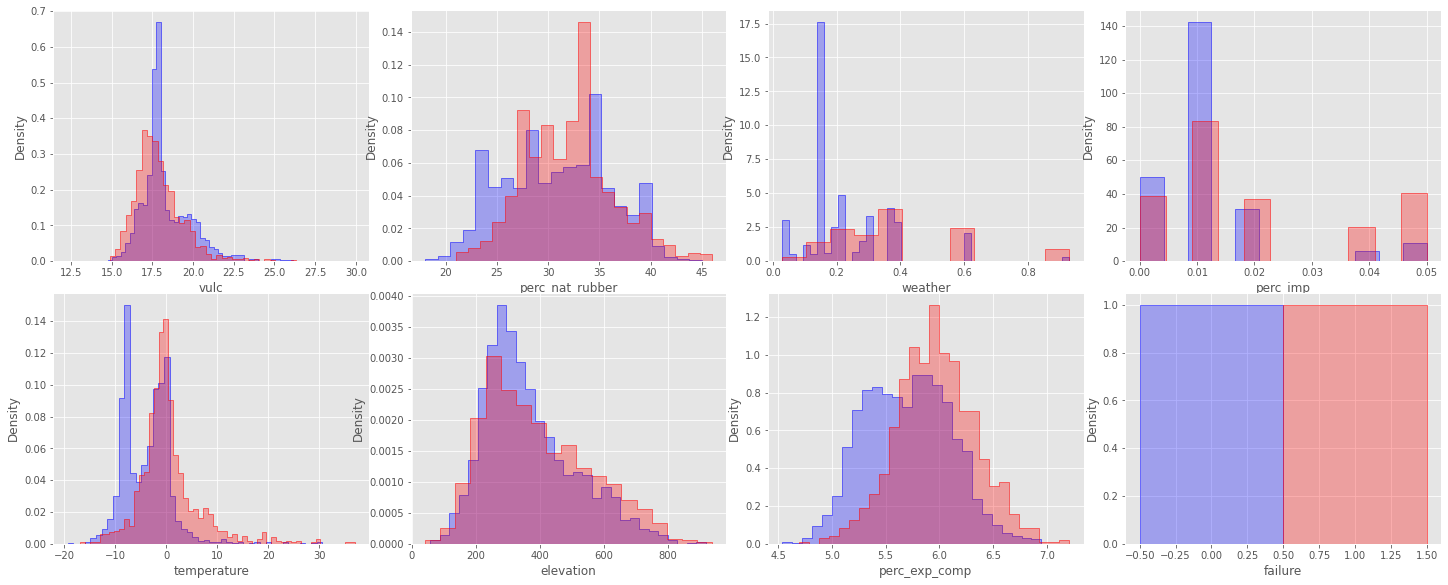

In [80]:
# Divide numerical data depending on their 
# value in 'failure'
# The results have been plotted with histograms
# This representation shows the attributes 
#in which observations have been classified 
# as 0 and 1 differ the most

X0 = data_drop_num[data_drop_num['failure']==0]
X1 = data_drop_num[data_drop_num['failure']==1]


fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(data_drop_num.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

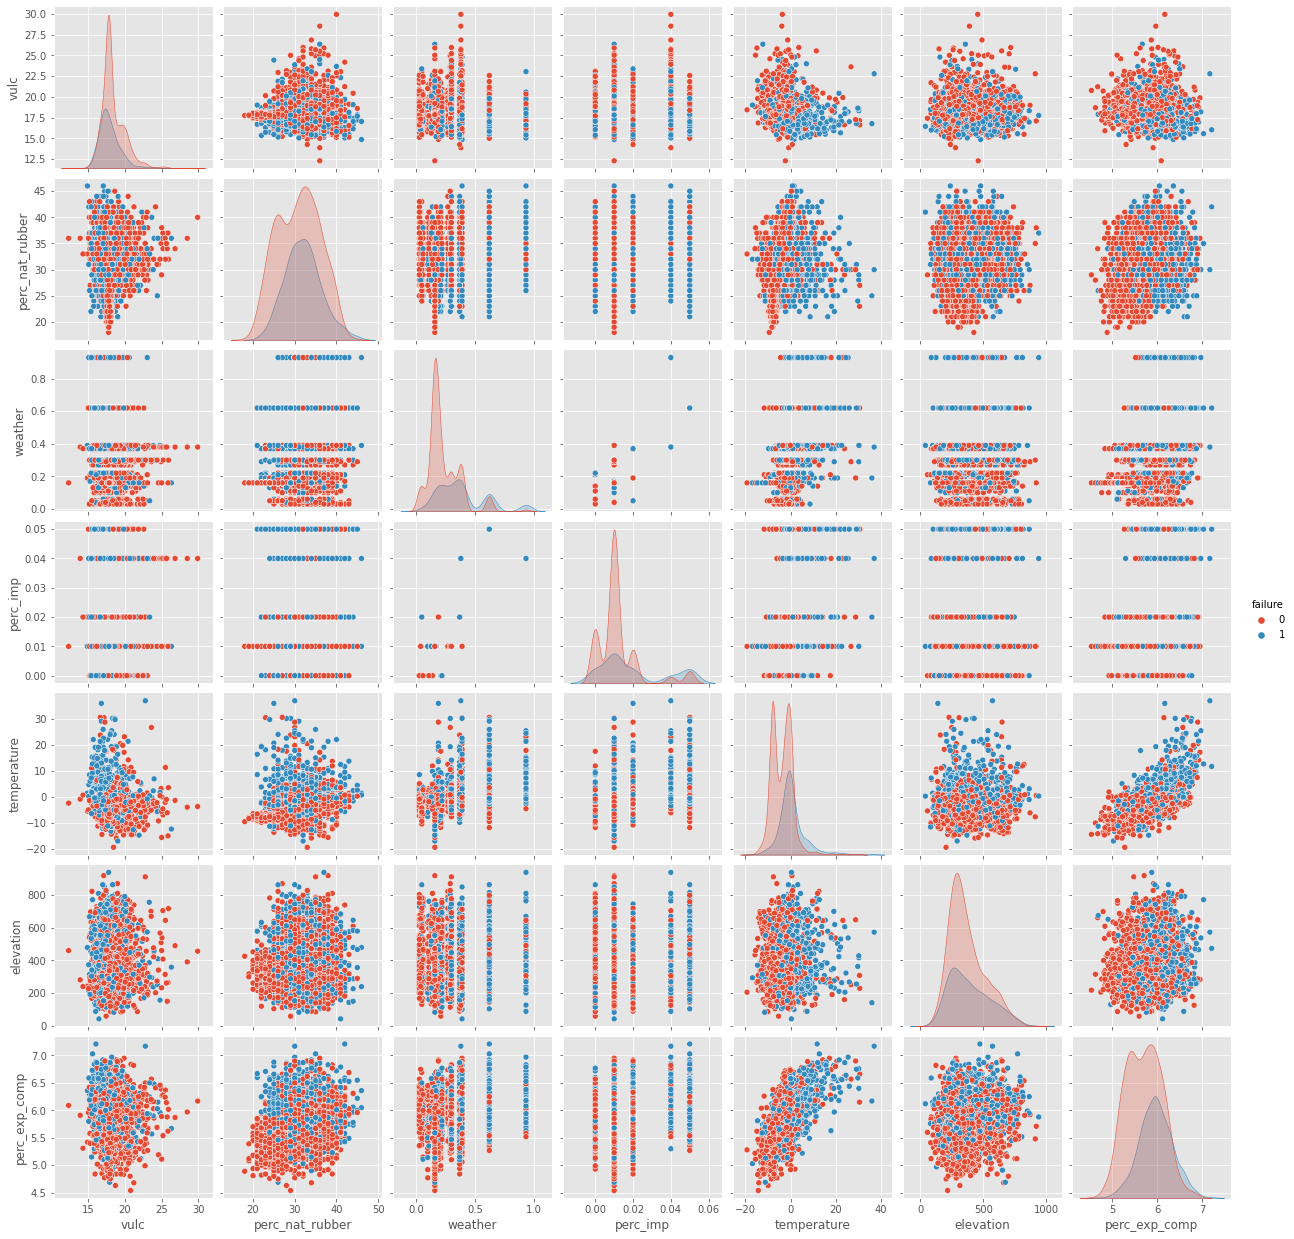

In [81]:
# This is a pairplot of the dataset where 
#observations with different values have different colors
# No pattern seems to be particularly significant

sns.pairplot(data_drop_num, hue='failure')

### DATA STANDARDIZATION


In [82]:
# Before training the model the data needs
# to be standardized to ensure consistency
# the target column is not standardized

from sklearn.preprocessing import StandardScaler

independent_variables=data_drop_num.iloc[:,:-1] 

scaler = StandardScaler().fit(independent_variables) 
scaled_data = pd.DataFrame(scaler.transform(independent_variables))
scaled_data.columns = independent_variables.columns

scaled_data.tail()


,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
2995,-0.231083,-0.456093,0.584065,-0.319087,1.702514,-0.586827,-0.271809
2996,-0.698653,-0.253355,-0.343773,-1.020379,0.164930,-1.480129,0.045070
2997,-1.269567,0.354859,0.584065,-0.319087,-0.187726,-0.934222,-0.539937
2998,0.433093,1.165810,-1.380768,-1.020379,0.284834,-0.570284,0.240072
2999,1.315301,0.354859,-1.217032,-1.020379,0.912563,0.190677,0.508200


In [83]:
# Save the scaler in order to use later to
# make predictions
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

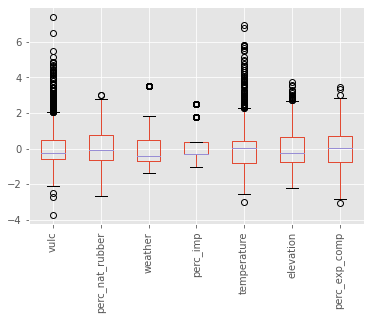

In [84]:
# The data have been standardized correctly 
# since all numerical attributes are now zero-mean
scaled_data.boxplot(rot=90)

In [85]:
#Correlation matrix that shows the 
# correlation coefficients between variables
corr = scaled_data.corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
vulc,1.000000,0.093481,-0.099199,-0.053442,-0.150478,0.009925,-0.029215
perc_nat_rubber,0.093481,1.000000,0.253128,0.119961,0.286195,0.090967,0.324937
weather,-0.099199,0.253128,1.000000,0.799274,0.425477,0.105047,0.371073
perc_imp,-0.053442,0.119961,0.799274,1.000000,0.288033,0.093891,0.253979
temperature,-0.150478,0.286195,0.425477,0.288033,1.000000,0.117603,0.654213
elevation,0.009925,0.090967,0.105047,0.093891,0.117603,1.000000,0.168657
perc_exp_comp,-0.029215,0.324937,0.371073,0.253979,0.654213,0.168657,1.000000


In [86]:
# Here we reunite categorical 
# and numerical variables
X = pd.concat([data_drop_cat, scaled_data, data_drop["failure"]], axis=1)
X.shape
X.head()

,wiring_strength,tread_type,tyre_season,month,tread_depth,tyre_quality,add_layers,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
0,1,0,1,8,0,1,1,-0.122697,-1.064306,-0.671245,-0.319087,-1.012943,-0.289059,-1.612448,0
1,1,2,0,11,1,0,1,1.587525,0.963073,0.092857,-0.319087,-0.378161,-0.318836,0.873829,0
2,1,0,0,0,1,0,1,0.612055,0.557597,0.092857,-0.319087,0.228409,-0.854817,1.385710,0
3,1,1,0,7,3,1,1,-0.871314,0.760335,-0.507509,0.382204,1.730726,0.210528,2.019467,0
4,2,0,1,2,2,0,1,-0.658323,-1.672520,0.584065,-0.319087,5.800384,-0.451177,0.873829,0


### SEPARATE TRAIN and TEST SETS

In [87]:
# The test set will contain 30% of the 
# observations of the original set
# The proportion of the target variable 
#is being preserved
# fix a random seed for replicability

from sklearn.model_selection import train_test_split
y = X['failure']
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y, 
                                                    random_state= 321) 

print(X_train.shape, X_test.shape)

(2100, 15) (900, 15)


In [88]:
# Also in the train set:
# 0: 66.4% of observations
# 1: 33.6% of observations
print(X_train.groupby("failure").size())

failure
0    1394
1     706
dtype: int64


In [89]:
# Here we resample the dataset and make it balanced
# We decided to use oversampling because it 
# gives the best result among oversamplig,
# undersampling and SMOTE.
# Note that we resample only the train set in 
# order to not make the results biased

# The resampling is being executed with 
# replacement and the number of observations with 
# 'failure' 1 will be equal to the number 
# of the ones with 'failure' 0.

from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
data_majority = X_train[X_train.failure==0] #"target" is the name of the target column, change it accordingly to your dataset
data_minority = X_train[X_train.failure==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
data_minority_oversampled = resample(data_minority, 
                                   replace=True,
                                   n_samples=1394,     # number of samples into the minority class 
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
data_oversampled = pd.concat([data_minority_oversampled, data_majority])
 
#4) Display new class counts
data_oversampled.failure.value_counts() #"target" is the name of the target column, change it accordingly to your dataset



1    1394
0    1394
Name: failure, dtype: int64

In [90]:
# Here we remove 'failure' column from resampled and
# non-resampled train sets and from the X_tes.
# To y_train_res has been assigned the 
# corresponding oversampled target variable

X_train = X_train.drop(["failure"],axis=1)
X_train_res = data_oversampled.drop(["failure"],axis=1)
y_train_res = data_oversampled["failure"]
X_test = X_test.drop(["failure"],axis=1)

### TRAIN MODELS


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [92]:
from sklearn.model_selection import StratifiedKFold


In [93]:
# With this function we tunes the 
# hyper-parameters of a model given in input
# The best F1 score obtained using the 
# best parameters is printed.
# The model is then used to make predictions 
# on the train set and on the test set.
# The value of precision, recall and F1 
# is also printed with the confusion matrix. 

cv = StratifiedKFold(5, shuffle=True, random_state=0) ## cv
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=cv, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_)) #

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
    print("recall    train  %.3f   test %.3f" % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred))) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    

In [94]:
# This function works in the same way as the one above.
# In this case we use the RESAMPLED train set

cv = StratifiedKFold(5, shuffle=True, random_state=0)
def hyperp_search_res(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=cv, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train_res, y_train_res)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_)) #

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train_res)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train_res, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train_res, y_pred_train), precision_score(y_test, y_pred) ))
    print("recall    train  %.3f   test %.3f" % (recall_score(y_train_res, y_pred_train), recall_score(y_test, y_pred))) 
    print("")
    print(confusion_matrix(y_test, y_pred))

In [95]:
# This function takes in input X_train_res,
#y_train_res, y_test and the model selected,
# then it shows the ROC curve obtained 
#and prints the AUC

def roc(model,X_train_res,y_train_res,X_test,y_test):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) 
    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)



KNN CLASSIFIER

In [96]:
# Results not great
# There is also overfitting, 
#especially with resampling
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,60,1)}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.508967 using {'n_neighbors': 21}
f1         train 0.544   test 0.536
precision  train 0.689   test 0.656
recall    train  0.449   test 0.454

[[526  72]
 [165 137]]

 WITH RESAMPLING 

f1_train: 0.730127 using {'n_neighbors': 49}
f1         train 0.746   test 0.610
precision  train 0.691   test 0.500
recall    train  0.810   test 0.781

[[362 236]
 [ 66 236]]



 WITH RESAMPLING 



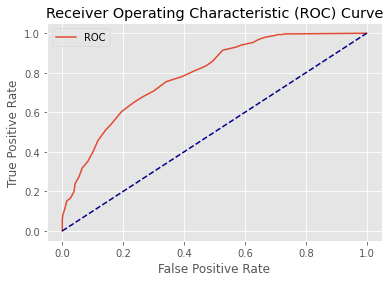

AUC: 0.79


In [98]:
model_knn = KNeighborsClassifier(n_neighbors = 49)
print("\n WITH RESAMPLING \n")
fpr1,tpr1=roc(model_knn,X_train_res,y_train_res,X_test,y_test)

TREE CLASSIFIER

In [99]:
# Results not great

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [10],
              'min_samples_split': [200],
              'min_samples_leaf': [20]}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.585547 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 200}
f1         train 0.630   test 0.616
precision  train 0.655   test 0.633
recall    train  0.606   test 0.599

[[493 105]
 [121 181]]

 WITH RESAMPLING 

f1_train: 0.719405 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 200}
f1         train 0.774   test 0.640
precision  train 0.736   test 0.537
recall    train  0.817   test 0.791

[[392 206]
 [ 63 239]]



 WITH RESAMPLING 



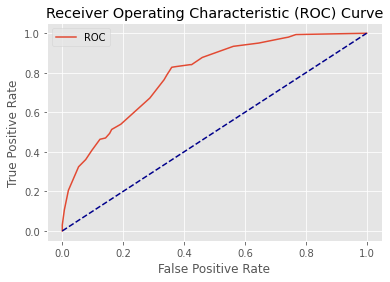

AUC: 0.79


In [100]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20, min_samples_split=200)
print("\n WITH RESAMPLING \n")
fpr2,tpr2=roc(model_tree,X_train_res,y_train_res,X_test,y_test)

NAIVE BAYES CLASSIFIER

In [101]:
# NO RESAMPLING

from sklearn.naive_bayes import GaussianNB 

model_nb = GaussianNB()

model_nb.fit(X_train, y_train)
y_pred=model_nb.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5993690851735016
f1_test:  0.5993690851735016
[[456 142]
 [112 190]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       598
           1       0.57      0.63      0.60       302

    accuracy                           0.72       900
   macro avg       0.69      0.70      0.69       900
weighted avg       0.73      0.72      0.72       900



In [102]:
# WITH RESAMPLING

from sklearn.naive_bayes import GaussianNB 

model_nb_res = GaussianNB()

model_nb_res.fit(X_train_res, y_train_res)
y_pred=model_nb_res.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5991561181434598
f1_test:  0.5991561181434598
[[402 196]
 [ 89 213]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       598
           1       0.52      0.71      0.60       302

    accuracy                           0.68       900
   macro avg       0.67      0.69      0.67       900
weighted avg       0.72      0.68      0.69       900




 WITH RESAMPLING 



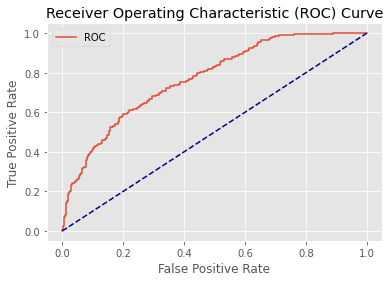

AUC: 0.77


In [103]:
y_probs = model_nb_res.predict_proba(X_test) 
print("\n WITH RESAMPLING \n")
fpr3,tpr3=roc(model_nb_res,X_train_res,y_train_res,X_test,y_test)

LOGISTIC REGRESSION CLASSIFIER

In [104]:
# This classifier gives good results 
#and it was one of the best we had

from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression()
parameters = {"C":[0.3,0.2,1e-1,0.5,1,10], "max_iter":[1000] }


print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)



 NO RESAMPLING 

f1_train: 0.537417 using {'C': 10, 'max_iter': 1000}
f1         train 0.556   test 0.604
precision  train 0.658   test 0.680
recall    train  0.482   test 0.543

[[521  77]
 [138 164]]

 WITH RESAMPLING 

f1_train: 0.723272 using {'C': 0.1, 'max_iter': 1000}
f1         train 0.731   test 0.651
precision  train 0.715   test 0.561
recall    train  0.747   test 0.775

[[415 183]
 [ 68 234]]



 WITH RESAMPLING 



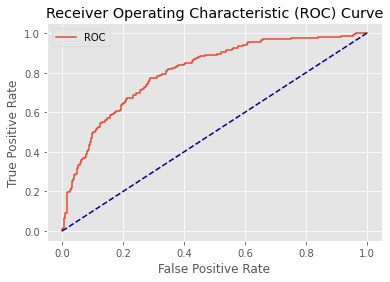

AUC: 0.81


In [105]:
model_logistic = LogisticRegression(C=0.1, max_iter=1000)
print("\n WITH RESAMPLING \n")
fpr4,tpr4=roc(model_logistic,X_train_res,y_train_res,X_test,y_test)

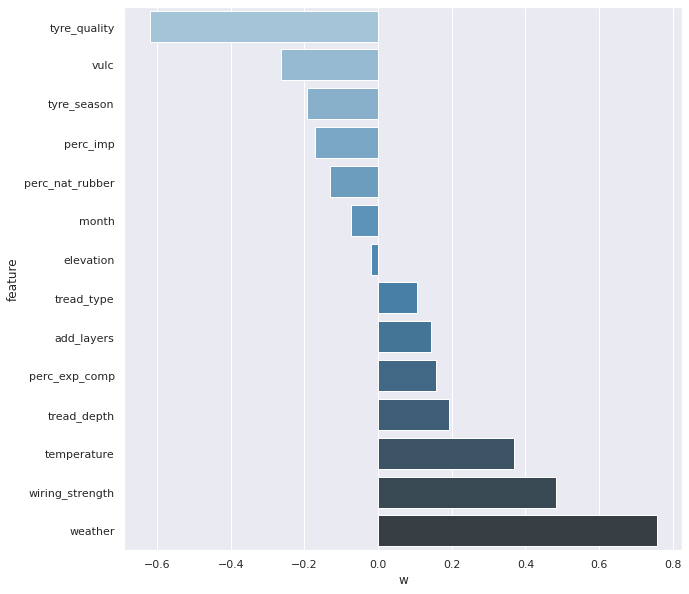

In [106]:
# Here we can see the effect of each variable

model_logistic.fit(X_train_res,y_train_res)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model_logistic.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})

SUPPORT VECTOR MACHINES

In [107]:
# This model gives the best results and 
#it is the one we will use to make
# predictions because it has a good F1,
#precision and the best recall.
# The AUC is also good

# Here are reported only the results with 
#the best parameters among different 
#combinations that we have tried

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[1500], "gamma":[1e-4]}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.527990 using {'C': 1500, 'gamma': 0.0001, 'kernel': 'linear'}
f1         train 0.542   test 0.584
precision  train 0.700   test 0.702
recall    train  0.442   test 0.500

[[534  64]
 [151 151]]

 WITH RESAMPLING 

f1_train: 0.733939 using {'C': 1500, 'gamma': 0.0001, 'kernel': 'rbf'}
f1         train 0.748   test 0.654
precision  train 0.712   test 0.550
recall    train  0.789   test 0.808

[[398 200]
 [ 58 244]]



 WITH RESAMPLING 



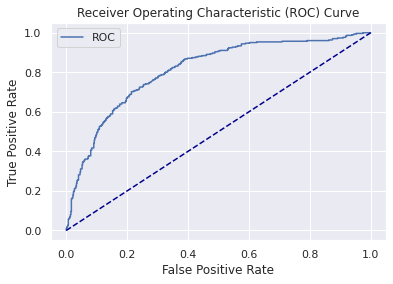

AUC: 0.81


In [108]:
model_svm = SVC(C=1500, kernel='rbf',probability=True, gamma= 1e-4)
print("\n WITH RESAMPLING \n")
fpr5,tpr5=roc(model_svm,X_train_res,y_train_res,X_test,y_test)

NEURAL NETWORKS

In [109]:
# The result is about one of the best 
#disposition of nodes and layer
# that we obtained

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(3,3)],"activation":["logistic", "tanh", "relu"], "max_iter":[1000],
              "learning_rate":["constant", "adaptive"], "alpha": [0.001,0.01,0.1,0.05,0.2]}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.594102 using {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'adaptive', 'max_iter': 1000}
f1         train 0.595   test 0.609
precision  train 0.664   test 0.654
recall    train  0.540   test 0.570

[[507  91]
 [130 172]]

 WITH RESAMPLING 

f1_train: 0.742283 using {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'max_iter': 1000}
f1         train 0.731   test 0.665
precision  train 0.733   test 0.584
recall    train  0.730   test 0.772

[[432 166]
 [ 69 233]]



 WITH RESAMPLING 



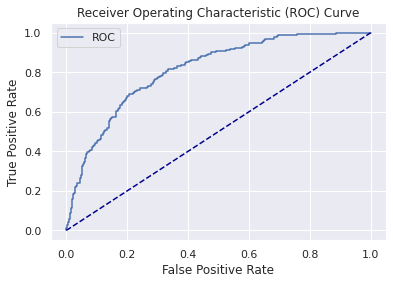

AUC: 0.81


In [110]:
model_MLP=MLPClassifier(hidden_layer_sizes=(3,3), alpha=0.01, 
                        max_iter=1000, activation='logistic', learning_rate='adaptive')
print("\n WITH RESAMPLING \n")
fpr6,tpr6=roc(model_MLP,X_train_res,y_train_res,X_test,y_test)

RANDOM FOREST

In [111]:
# The results are decent but we discarded 
#it due to overfitting

from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [25, 30, 50, 75, 100],
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [1,2,3,4], 
             'min_samples_split' : [100],
              'min_samples_leaf' : [50]
             }

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)


 NO RESAMPLING 

f1_train: 0.507459 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 75}
f1         train 0.519   test 0.519
precision  train 0.742   test 0.738
recall    train  0.399   test 0.401

[[555  43]
 [181 121]]

 WITH RESAMPLING 

f1_train: 0.748122 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 50}
f1         train 0.759   test 0.646
precision  train 0.697   test 0.532
recall    train  0.834   test 0.821

[[380 218]
 [ 54 248]]



 WITH RESAMPLING 



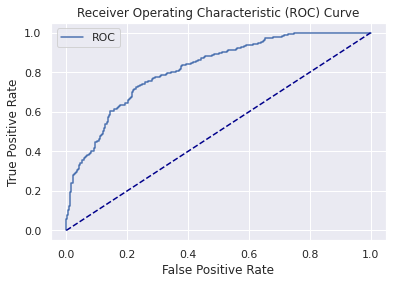

AUC: 0.82


In [112]:
model_rf=RandomForestClassifier(criterion ='gini', max_depth= 4, 
                                min_samples_leaf= 50, min_samples_split= 100, n_estimators= 50 )
print("\n WITH RESAMPLING \n")
fpr7,tpr7=roc(model_rf,X_train_res,y_train_res,X_test,y_test)

ADABOOST

In [113]:
# We decided to discard this model because of the F1 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [1, 5],
    'learning_rate' : [0.0001, 0.01, 0.1, 1, 10], 'base_estimator':[DecisionTreeClassifier(max_depth=3)]}

print("\n NO RESAMPLING \n")
hyperp_search(classifier,parameters)
print("\n WITH RESAMPLING \n")
hyperp_search_res(classifier,parameters)



 NO RESAMPLING 

f1_train: 0.551668 using {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1, 'n_estimators': 5}
f1         train 0.599   test 0.557
precision  train 0.694   test 0.646
recall    train  0.527   test 0.490

[[517  81]
 [154 148]]

 WITH RESAMPLING 

f1_train: 0.739914 using {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 5}
f1         train 0.765   test 0.623
precision  train 0.703   test 0.516
recall    train  0.839   test 0.785

[[376 222]
 [ 65 237]]



 WITH RESAMPLING 



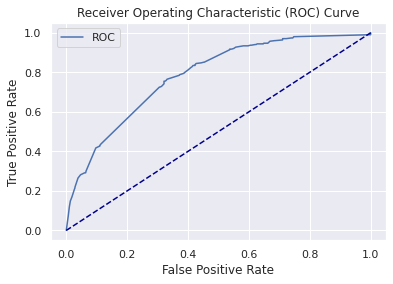

AUC: 0.78


In [115]:
model_ab=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth= 3), learning_rate= 0.1, n_estimators= 5)
print("\n WITH RESAMPLING \n")
fpr8,tpr8=roc(model_ab,X_train_res,y_train_res,X_test,y_test)

###**SAVE THE MODEL AND MAKE PREDICTIONS ON NEW DATA** 



In [116]:
# On one hand resampling has improved the 
#quality of our models. 
#On the other hand it increases also the overfitting
# We choose to use Sample vector machines trained 
#with resampled train set
# C = 1500, gamma = 0.0001, kernel = rbf

# Here we save the model and choose to make predictions with pickle
pickle.dump(model_svm, open('svm_model.pkl', 'wb'))

In [117]:
# Load the model and the scaler saved before
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_model = pickle.load(open('svm_model.pkl', 'rb'))

In [118]:
# Read the new dataset

df = pd.read_csv('tyres_test.csv')

In [119]:
# The new dataset must be processed in the same 
#way as the dataset used to train the model,


df=df.drop(["diameter"], axis=1)

# Categorical
df_cat = df[["wiring_strength","tread_type","tyre_season","month","tread_depth","tyre_quality","add_layers"]]
    
# Numerical
df_num = df[["vulc","perc_nat_rubber","weather","perc_imp","temperature","elevation","perc_exp_comp"]]
# Scaling 

scaled_df_num = pd.DataFrame(loaded_scaler.transform(df_num))
scaled_df_num.columns = df_num.columns

# Recreating the dataset

X2=pd.concat([df_cat,scaled_df_num], axis = 1)

In [120]:
X2

,wiring_strength,tread_type,tyre_season,month,tread_depth,tyre_quality,add_layers,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,1,0,1,4,3,0,1,-0.633118,-0.253355,-0.398352,-1.020379,-1.210431,0.557923,-0.613062
1,1,0,1,8,0,1,1,-0.277714,-1.469782,-0.671245,-0.319087,-1.189271,-0.646380,-1.904952
2,0,2,0,11,2,0,1,-0.790655,0.557597,-0.070879,-0.319087,1.060678,2.364379,1.507586
3,1,3,0,9,3,0,1,2.673901,0.557597,-1.380768,-1.020379,0.517587,-0.930914,0.386324
4,1,3,0,9,0,1,1,-0.861231,-0.456093,-1.217032,-1.020379,0.249568,0.561232,0.435074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,1,4,1,6,2,1,1,1.181710,-0.050617,0.038278,-0.319087,0.489375,-0.097165,0.240072
7980,1,0,1,8,0,1,1,-0.294098,-2.077996,-0.671245,-0.319087,-1.111687,0.220454,-0.564312
7981,1,0,1,8,0,1,1,-0.174370,-1.672520,-0.671245,-0.319087,-0.801349,-0.729093,-1.441821
7982,1,0,1,8,0,1,1,-0.169328,-0.658831,-0.671245,-0.319087,-0.977677,-0.497497,-0.076806


In [121]:
# Use the model to make predictions on the new dataset
y_svm_predictions = loaded_model.predict(X2)

In [122]:
# Check dimensions of the vector

y_svm_predictions.shape

(7984,)

In [123]:
# Export predictions on a txt file
from numpy import savetxt

np.savetxt('y_svm_predictions.txt', y_svm_predictions, fmt='%.0f')